In [542]:
import pandas as pd
# pd.set_option('display.max_rows', 10) 
pd.set_option('display.max_columns', None)

In [545]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats_100pos.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')


In [546]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']

# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [547]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['AGE_y', 'NICKNAME', 'TEAM_ID_x', 'PLAYER_NAME_y', 'TEAM_ID_y', 'TEAM_ABBREVIATION_y', 'AGE_y']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True)          

In [549]:
# Checking the result of 'merged_df_stats_bio'
# merged_df_stats_bio 

In [550]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY', 
    
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)


In [551]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

In [552]:
#final_merged_df

In [554]:
#Make list to filter for players from Europe 
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [556]:
# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

#final_merged_df

Convert height from feet to meters

In [538]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select the columns for correlation
# selected_columns = ['PLAYER_HEIGHT_METERS', 'REB', 'AST', 'FG3M', 'BLK']

# # Calculate the correlation matrix
# correlation_matrix = final_merged_df[selected_columns].corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

AttributeError: 'YTick' object has no attribute 'label'

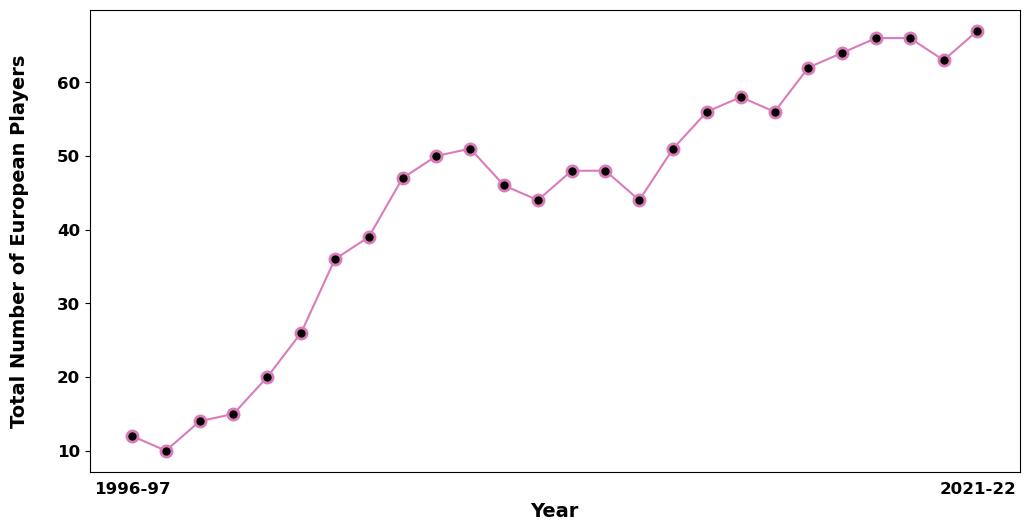

In [564]:
import matplotlib.pyplot as plt

# Define colors
dark_blue = '#1f77b4'  # Dark blue
background_color_inside = 'white'  # Background color inside the graph
background_color_outside = 'white'  # Background color outside the graph
axis_label_color = 'black'  # Axis label color without fill
highlight_color = 'black'  # Highlight color for specific ticks
graph_line_color = '#da7bba'  # Graph line color

# Set the style to default
plt.style.use('default')

# Set the background color outside the graph to white
fig = plt.figure(facecolor=background_color_outside, figsize=(12, 6))

# Filter out the year 2023
filtered_data = final_merged_df[final_merged_df['Year'] != '2022-23']
european_players_per_year = filtered_data[filtered_data['COUNTRY'].isin(europe)].groupby('Year')['PLAYER_ID'].nunique().reset_index()
european_players_per_year.rename(columns={'PLAYER_ID': 'European Players'}, inplace=True)

# Plot the results with custom color
ax = plt.gca()
ax.set_facecolor(background_color_inside)  # Set background color inside the graph
plt.plot(european_players_per_year['Year'], european_players_per_year['European Players'], marker='o', linestyle='-', color=graph_line_color, markersize=8, markerfacecolor='black', markeredgewidth=2)  # Custom graph color
plt.xlabel('Year', color=axis_label_color, fontsize=14, fontweight='bold')  # Adjusting font size and weight
plt.ylabel('Total Number of European Players', color=axis_label_color, fontsize=14, fontweight='bold', labelpad=20)  # Adjusting font size, weight, and labelpad

# Remove grid lines
plt.grid(False)

# Set the color of tick labels
plt.xticks([european_players_per_year['Year'].iloc[0], european_players_per_year['Year'].iloc[-1]], color=axis_label_color, fontsize=12, fontweight='bold')  # Adjusting font size and weight
plt.yticks(color=axis_label_color, fontsize=12, fontweight='bold')  # Adjusting font size and weight

# Highlight specific tick labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelcolor=highlight_color)  # Hide ticks and set label color to black

# Make just the number 60 black on the y-axis
plt.tick_params(axis='y', colors='black')  # Set all y-axis ticks to black
ax.yaxis.get_major_ticks()[6].label.set_color('black')  # Set the color of the tick label at index 6 to black (assuming 60 is the 7th tick)

#plt.show()


Correlation coefficient between European players per team and total wins per team: 0.7662464706894421


AttributeError: 'YTick' object has no attribute 'label'

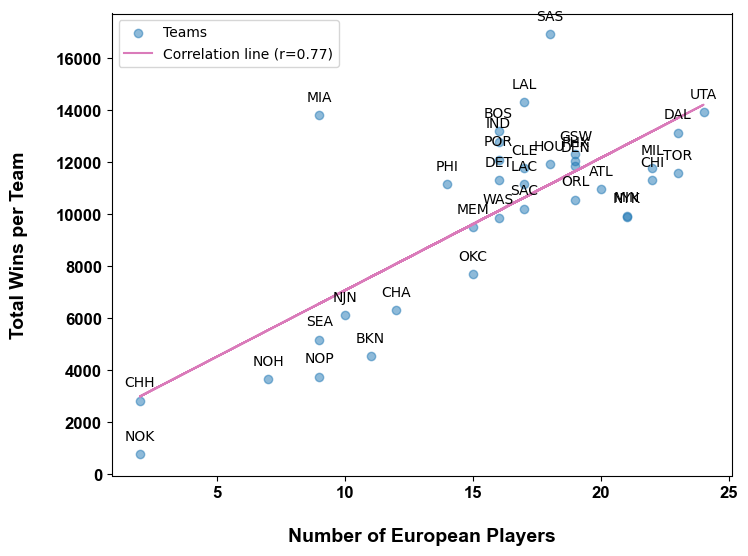

In [563]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Set the style to default
plt.style.use('default')

# Define colors for dark blue and dark red
dark_blue = '#1f77b4'  # Dark blue
background_color = 'white'  # Background color
axis_label_color = 'black'  # Axis label color without fill
highlight_color = 'black'  # Highlight color for specific ticks
correlation_line_color = '#da7bba'  # Correlation line color

# Count the total number of European players per team
european_players_per_team = final_merged_df[final_merged_df['COUNTRY'].isin(europe)].groupby('TEAM_ABBREVIATION')['PLAYER_ID'].nunique().reset_index()
european_players_per_team.rename(columns={'PLAYER_ID': 'European Players'}, inplace=True)

# Calculate the total wins per team
total_wins_per_team = final_merged_df.groupby('TEAM_ABBREVIATION')['W'].sum().reset_index()

# Merge the two dataframes on the team abbreviation
merged_data = pd.merge(european_players_per_team, total_wins_per_team, on='TEAM_ABBREVIATION', how='inner')

# Calculate the correlation coefficient
correlation, p_value = stats.pearsonr(merged_data['European Players'], merged_data['W'])
print("Correlation coefficient between European players per team and total wins per team:", correlation)

# Create a scatter plot with the correlation line
fig, ax = plt.subplots(figsize=(8, 6), facecolor=background_color)
ax.patch.set_facecolor(background_color)  # Set background color

plt.scatter(merged_data['European Players'], merged_data['W'], color=dark_blue, alpha=0.5, label='Teams')  # Add label to scatter points

# Add team names as hover labels
for i, team in enumerate(merged_data['TEAM_ABBREVIATION']):
    plt.annotate(team, (merged_data['European Players'][i], merged_data['W'][i]), textcoords="offset points", xytext=(0,10), ha='center', color=axis_label_color)

# Add the correlation line with custom color and legend
x = merged_data['European Players']
y = merged_data['W']
slope, intercept, r, p, se = stats.linregress(x, y)
plt.plot(x, intercept + slope * x, color=correlation_line_color, label=f'Correlation line (r={correlation:.2f})')  # Change color and add label
plt.legend()

# Set axis labels and tick parameters
plt.ylabel('Total Wins per Team', color=axis_label_color, fontsize=14, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.xlabel('Number of European Players', color=axis_label_color, fontsize=14, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.xticks(color=axis_label_color, fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(color=axis_label_color, fontsize=12, fontweight='bold', fontfamily='Arial')
plt.tick_params(axis='y', colors='black')
ax.yaxis.get_major_ticks()[6].label.set_color('black')

#plt.grid(False)  # Remove grid lines

# plt.show()


In [565]:
import pandas as pd

# Filter data for the regular season
regular_season_data = final_merged_df[final_merged_df['Season'] == 'Regular Season']

# Count the total number of European players per team for the regular season
european_players_per_team_regular = regular_season_data[regular_season_data['COUNTRY'].isin(europe)].groupby('TEAM_ABBREVIATION')['PLAYER_ID'].nunique().reset_index()
european_players_per_team_regular.rename(columns={'PLAYER_ID': 'European Players'}, inplace=True)

# Calculate the total wins per team for the regular season
total_wins_per_team_regular = regular_season_data.groupby('TEAM_ABBREVIATION')['W'].sum().reset_index()

# Merge the two dataframes on the team abbreviation for the regular season
merged_data_regular = pd.merge(european_players_per_team_regular, total_wins_per_team_regular, on='TEAM_ABBREVIATION', how='inner')

# Calculate the correlation coefficient for the regular season
correlation_regular = merged_data_regular['European Players'].corr(merged_data_regular['W'])

print("Correlation coefficient between European players per team and total wins per team for the regular season:", correlation_regular)

# Filter data for the playoffs
playoffs_data = final_merged_df[final_merged_df['Season'] == 'Playoffs']

# Count the total number of European players per team for the playoffs
european_players_per_team_playoffs = playoffs_data[playoffs_data['COUNTRY'].isin(europe)].groupby('TEAM_ABBREVIATION')['PLAYER_ID'].nunique().reset_index()
european_players_per_team_playoffs.rename(columns={'PLAYER_ID': 'European Players'}, inplace=True)

# Calculate the total wins per team for the playoffs
total_wins_per_team_playoffs = playoffs_data.groupby('TEAM_ABBREVIATION')['W'].sum().reset_index()

# Merge the two dataframes on the team abbreviation for the playoffs
merged_data_playoffs = pd.merge(european_players_per_team_playoffs, total_wins_per_team_playoffs, on='TEAM_ABBREVIATION', how='inner')

# Calculate the correlation coefficient for the playoffs
correlation_playoffs = merged_data_playoffs['European Players'].corr(merged_data_playoffs['W'])

print("Correlation coefficient between European players per team and total wins per team for the playoffs:", correlation_playoffs)


Correlation coefficient between European players per team and total wins per team for the regular season: 0.7995653946613661
Correlation coefficient between European players per team and total wins per team for the playoffs: 0.5188692177222711


In [566]:
selected_columns = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [568]:
import altair as alt

# Melt the DataFrame to have a long format
melted_df = change_df_regular_season.melt(id_vars='Year', var_name='Metric', value_name='Value')

# Create selection for interactive legend
selection = alt.selection_multi(fields=['Metric'], bind='legend')

# Create the line chart with interactive legend
chart = alt.Chart(melted_df).mark_line().encode(
    x='Year:O',
    y='Value:Q',
    color=alt.condition(selection, 'Metric:N', alt.value('lightgray')),
    tooltip=['Year', 'Metric', 'Value']
).add_selection(
    selection
).properties(
    title='Changes in Selected Metrics Over the Years',
    width=800,
    height=600
)

# Display the chart´´
#chart


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


In [569]:
import altair as alt

# Melt the DataFrame to have a long format
melted_df = change_df_regular_season.melt(id_vars='Year', var_name='Metric', value_name='Value')

# Create selection for interactive legend
selection = alt.selection_multi(fields=['Metric'], bind='legend')

# Create the line chart with interactive legend
chart = alt.Chart(melted_df).mark_line().encode(
    x='Year:O',
    y='Value:Q',
    color=alt.condition(selection, 'Metric:N', alt.value('lightgray')),
    tooltip=['Year', 'Metric', 'Value']
).add_selection(
    selection
).properties(
    title='Changes in Selected Metrics Over the Years',
    width=800,
    height=600
)

# Set the background color of the entire chart
background = alt.Chart(pd.DataFrame({'': [0]})).mark_rect(color='#0d0a2c').encode(x=alt.value(0), y=alt.value(0), x2=alt.value(1), y2=alt.value(1))

# Display the chart with the background
(chart + background).configure_axis(grid=False)  # Remove grid lines



/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

In [570]:


# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
final_merged_df['POSITION'] = final_merged_df['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')





In [571]:
#Get Table without European Players 
def filter_non_europe(df, column_name='', country_list=europe):
    return df[~df[column_name].isin(europe)]

#New object df for American players only 
usa_df = filter_non_europe(final_merged_df, 'COUNTRY')



In [573]:
total_cols = ['POSITION','PLAYER_HEIGHT_METERS', 'COUNTRY', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
              'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Sums up the values in the columns specified by total_cols for each group
data_per_min_usa = usa_df.groupby(['PLAYER_NAME', 'PLAYER_ID', 'Year', 'Season'])[total_cols].sum().reset_index()

# Shooting efficiency
data_per_min_usa['FG3A%'] = data_per_min_usa['FG3A'] / data_per_min_usa['FGA']  # Three-point-attempts percentage(total number of three points attempts/total number of field goal attempts)
data_per_min_usa['PTS/FGA'] = data_per_min_usa['PTS'] / data_per_min_usa['FGA']  # Point per Field Goal Attempt (total points scored/total number of field goal attempts )
data_per_min_usa['FG3M/FGM'] = data_per_min_usa['FG3M'] / data_per_min_usa['FGM']  # Three-point field goals made percentage (total number of three points field goals/total number of field goals made)
data_per_min_usa['FTA/FGA'] = data_per_min_usa['FTA'] / data_per_min_usa['FGA']  # Free throw attempts per field goal attempt (total number of free throw attempts/total number of field goal attempts), tendencies of players to draw fouls

# True Shooting Percentage
# Formula for true shooting percentage: Points / (2 * (Field Goal Attempts + 0.44 * Free Throw Attempts))
data_per_min_usa['TRU%'] = 0.5 * data_per_min_usa['PTS'] / (data_per_min_usa['FGA'] + 0.475 * data_per_min_usa['FTA'])
# points scored * 0.5 = value of a two point field goal (0.5 points per field goal attempt)
# 0.475: free throws are typically worth fewer points than field goals, scaling the number of free throw attempts
# --> Higher TRU: better shooting efficiency, because it considers the relative value of different types o shots and adjust the number of free throw attempts

# data_per_min_usa['TOV'] = data_per_min_usa['TOV'].apply(lambda x: 1.0 if x < 1.0 else x)
data_per_min_usa.drop(data_per_min_usa[data_per_min_usa['TOV'] < 1].index, inplace=True)

# Assists to Turnover Ratio:
# Efficiency in passing and ball handling
data_per_min_usa['AST_TOV'] = data_per_min_usa['AST'] / data_per_min_usa['TOV']

# # Replace NaN values in AST_TOV column with values from AST column where TOV is 0
data_per_min_usa['AST_TOV'] = data_per_min_usa['AST_TOV'].fillna(data_per_min_usa['AST'])






In [575]:
# Function to filer on countries
def filter_europe(df, column_name='', country_list=europe):
    return df[df[column_name].isin(europe)]

# New object df for European players only
europe_df = filter_europe(final_merged_df, 'COUNTRY')




In [577]:
total_cols = ['POSITION', 'COUNTRY', 'PLAYER_HEIGHT_METERS', 'MIN','FGM','FGA','FG3M','FG3A','FTM','FTA',
              'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

# Sums up the values in the columns specified by total_cols for each group 
data_per_min_europe = europe_df.groupby(['PLAYER_NAME','PLAYER_ID','Year', 'Season'])[total_cols].sum().reset_index()


# Shooting efficiency 
data_per_min_europe['FG3A%'] = data_per_min_europe['FG3A'] / data_per_min_europe['FGA']
data_per_min_europe['PTS/FGA'] = data_per_min_europe['PTS'] / data_per_min_europe['FGA']
data_per_min_europe['FG3M/FGM'] = data_per_min_europe['FG3M'] / data_per_min_europe['FGM']
data_per_min_europe['FTA/FGA'] = data_per_min_europe['FTA'] / data_per_min_europe['FGA']

# True Shooting Percentage
data_per_min_europe['TRU%'] = 0.5 * data_per_min_europe['PTS'] / (data_per_min_europe['FGA'] + 0.475 * data_per_min_europe['FTA'])

# data_per_min_europe['TOV'] = data_per_min_europe['TOV'].apply(lambda x: 1.0 if x < 1.0 else x)
data_per_min_europe.drop(data_per_min_europe[data_per_min_europe['TOV'] < 1].index, inplace=True)

# Assists to Turnover Ratio
data_per_min_europe['AST_TOV'] = data_per_min_europe['AST'] / data_per_min_europe['TOV'] 

# # Replace NaN values in AST_TOV column with values from AST column where TOV is 0
data_per_min_europe['AST_TOV'] = data_per_min_europe['AST_TOV'].fillna(data_per_min_europe['AST'])




Point Guard 

In [578]:
data_per_min_europe_regular= data_per_min_europe[(data_per_min_europe['Season'] == 'Regular Season') & (data_per_min_europe['POSITION'] == 'G')]

data_per_min_usa_regular = data_per_min_usa[(data_per_min_usa['Season'] == 'Regular Season') & (data_per_min_usa['POSITION'] == 'G')]




In [579]:
import altair as alt
import pandas as pd

# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
data_per_min_europe_regular['Europe'] = 'European'
data_per_min_usa_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([data_per_min_usa_regular, data_per_min_europe_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Define color scale
color_scale = alt.Scale(domain=['European', 'Non-European'], range=['#0d0a2c', '#c92684'])

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'), scale=color_scale)
    ).properties(
        title=f'Median {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
#alt_row




/var/folders/ks/jkyyt4g90l91_7gptfmjt_6c0000gn/T/ipykernel_1408/3764617726.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_min_europe_regular['Europe'] = 'European'
/var/folders/ks/jkyyt4g90l91_7gptfmjt_6c0000gn/T/ipykernel_1408/3764617726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_min_usa_regular['Europe'] = 'Non-European'


In [580]:
print(data_per_min_europe_regular['AST_TOV'].mean())
print(data_per_min_usa_regular['AST_TOV'].mean())


2.041492320086856
2.007470542524901


In [581]:
print(data_per_min_europe_regular['AST'].mean())
print(data_per_min_usa_regular['AST'].mean())

6.416796874999999
5.977095868431609


In [582]:
print(data_per_min_europe_regular['FG3M'].mean())
print(data_per_min_usa_regular['FG3M'].mean())

2.15234375
1.9895707982350581


In [583]:
import altair as alt
import pandas as pd

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_df.groupby('PLAYER_NAME')['AST'].agg(['median', 'std'])

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = usa_df.groupby('PLAYER_NAME')['AST'].agg(['median', 'std'])

# Create DataFrame for Altair
alt_df = pd.concat([avg_ast_std_europe, avg_ast_std_usa], keys=['European', 'Non-European'], names=['Region'])

# Reset index to have 'PLAYER_NAME' as a column
alt_df.reset_index(inplace=True)

# Create the Altair plot
alt_chart = alt.Chart(alt_df).mark_circle().encode(
    x=alt.X('median:Q', title='Median AST'),
    y=alt.Y('std:Q', title='Standard Deviation'),
    color=alt.Color('Region:N', scale=alt.Scale(domain=['European', 'Non-European'], range=['#0d0a2c', '#c92684']), legend=alt.Legend(title='Region'))
).properties(
    width=400,
    height=300,
    title='Median AST vs. Standard Deviation'
).configure_legend(
    labelFontSize=12,
    titleFontSize=14,
    titleFontWeight='bold'
)

# Show the plot
#alt_chart


In [585]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_df.groupby('PLAYER_NAME')['AST'].agg(['median', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = usa_df.groupby('PLAYER_NAME')['AST'].agg(['median', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('#0d0a2c'),  # Color for Europe
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Median AST vs. Standard Deviation (Europe)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('#c92684'),  # Color for Non-European
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Median AST vs. Standard Deviation (Non European)'
)

# Concatenate the plots
#scatter_europe | scatter_usa


In [586]:
print(data_per_min_europe_regular['AST'].std())
print(data_per_min_usa_regular['AST'].std())


3.2848778730618546
3.0103693861648364


In [587]:
print(data_per_min_europe_regular['FG3M'].std())
print(data_per_min_usa_regular['FG3M'].std())

1.0839264025193
1.2606710159804755


In [588]:
print(data_per_min_europe_regular['AST_TOV'].std())
print(data_per_min_usa_regular['AST_TOV'].std())

0.8535752856310536
0.8699767998033783


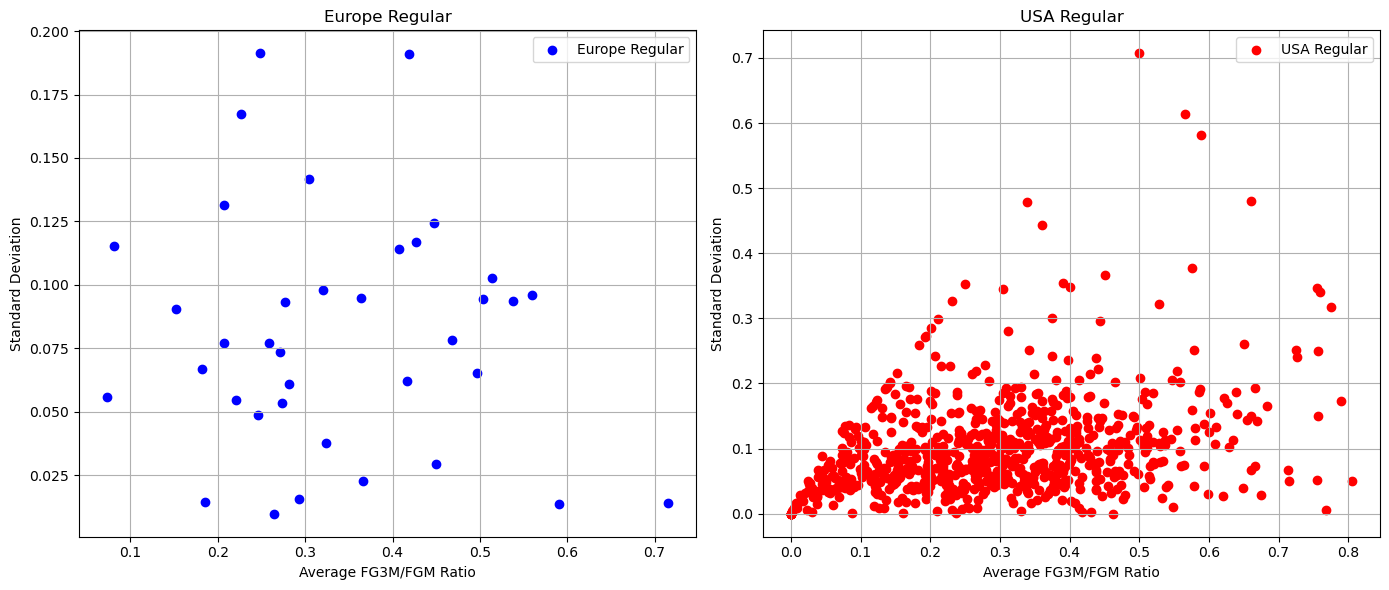

In [589]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_europe_regular
avg_fg3m_fgm_europe = data_per_min_europe_regular.groupby('PLAYER_ID')['FG3M/FGM'].agg(['mean', 'std'])

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_usa_regular
avg_fg3m_fgm_usa = data_per_min_usa_regular.groupby('PLAYER_ID')['FG3M/FGM'].agg(['mean', 'std'])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for data_per_min_europe_regular
axs[0].scatter(avg_fg3m_fgm_europe['mean'], avg_fg3m_fgm_europe['std'], label='Europe Regular', color='blue')
axs[0].set_xlabel('Average FG3M/FGM Ratio')
axs[0].set_ylabel('Standard Deviation')
axs[0].set_title('Europe Regular')
axs[0].legend()
axs[0].grid(True)

# Scatter plot for data_per_min_usa_regular
axs[1].scatter(avg_fg3m_fgm_usa['mean'], avg_fg3m_fgm_usa['std'], label='USA Regular', color='red')
axs[1].set_xlabel('Average FG3M/FGM Ratio')
axs[1].set_ylabel('Standard Deviation')
axs[1].set_title('USA Regular')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
# plt.show()


In [590]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = data_per_min_europe_regular.groupby('PLAYER_NAME')['AST'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = data_per_min_usa_regular.groupby('PLAYER_NAME')['AST'].agg(['mean', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average AST vs. Standard Deviation (Europe Regular)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average AST vs. Standard Deviation (USA Regular)'
)

# Concatenate the plots
#scatter_europe | scatter_usa


In [591]:
data_per_min_europe_filtered_playoffs = data_per_min_europe[(data_per_min_europe['Season'] == 'Playoffs') & (data_per_min_europe['POSITION'] == 'G')]
data_per_min_usa_filtered_playoffs = data_per_min_usa[(data_per_min_usa['Season'] == 'Playoffs') & (data_per_min_usa['POSITION'] == 'G')]


In [592]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
data_per_min_europe_filtered_playoffs['Europe'] = 'European'
data_per_min_usa_filtered_playoffs['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([data_per_min_usa_regular, data_per_min_europe_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'median({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
#alt_row


/var/folders/ks/jkyyt4g90l91_7gptfmjt_6c0000gn/T/ipykernel_1408/2298834658.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_min_europe_filtered_playoffs['Europe'] = 'European'
/var/folders/ks/jkyyt4g90l91_7gptfmjt_6c0000gn/T/ipykernel_1408/2298834658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_per_min_usa_filtered_playoffs['Europe'] = 'Non-European'


In [594]:
#data_per_min_europe_regular_filtered = data_per_min_europe_regular[(data_per_min_europe_regular['AST'] >= 6.3) & (data_per_min_europe_regular['AST_TOV'] >= 1.98) & (data_per_min_europe_regular['FG3M'] >= 2.1)]

<Figure size 640x480 with 0 Axes>

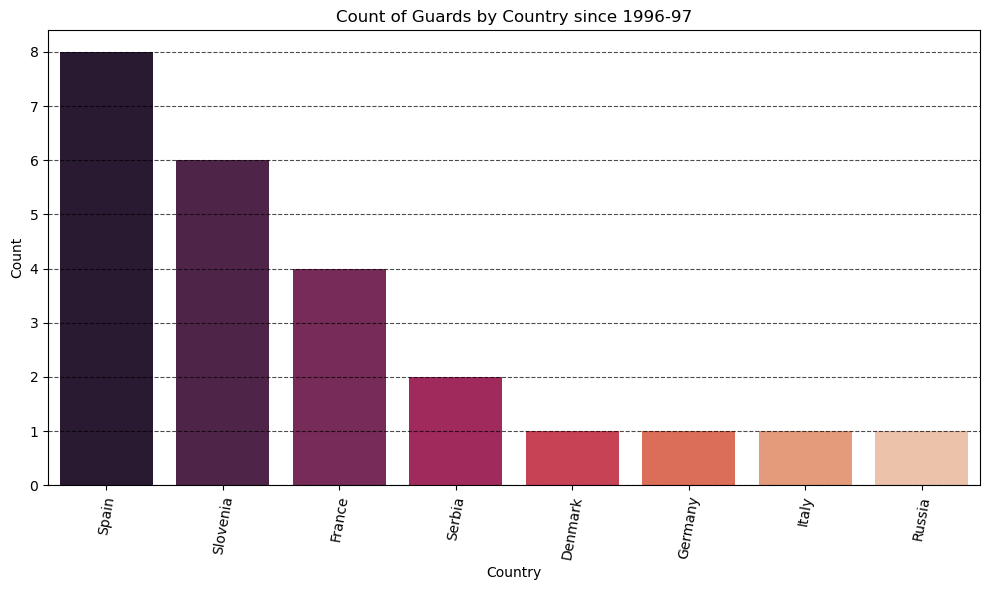

In [602]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Amount of unique players from those countries since 1996:
count_europe_unique = data_per_min_europe_regular_filtered.groupby('COUNTRY')['PLAYER_ID'].count().reset_index()

# Sort the DataFrame by the count of players in descending order
count_europe_unique = count_europe_unique.sort_values(by='PLAYER_ID', ascending=False)

# Set the figure's facecolor
plt.figure(facecolor='white')

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white') 

# Define the "rocket" palette for Seaborn
sns.barplot(x='COUNTRY', y="PLAYER_ID", data=count_europe_unique, palette='rocket', linewidth=2, color='#0d0a2c')  # Set the color of the bars
plt.xticks(rotation=45, color='black')  # Rotate x-axis labels for better readability with many countries
plt.yticks(color='black')  # Set y-axis labels color

# Set the background color of the bars
ax.set_facecolor('white')

plt.title("Count of Guards by Country since 1996-97", color='black')
plt.xlabel("Country", color='black')
plt.ylabel("Count", color='black')
plt.xticks(rotation=80, color='black')  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

# plt.show()  # Display the plot






Secondary/Potential Assist 

In [603]:
second_potential_assists= pd.read_csv('DataFiles/player_stats_secondary_assist.csv')
second_potential_assists



PermissionError: [Errno 1] Operation not permitted: 'DataFiles/player_stats_secondary_assist.csv'

In [ ]:
# Filter final_merged_df to only include rows with Season = 'Regular Season'
final_merged_df_regular_season = final_merged_df[final_merged_df['Season'] == 'Regular Season']

# Merge final_merged_df_regular_season with second_potential_assists on 'PLAYER_ID', 'Year', and 'Season'
merged_secondary_potential_assists = pd.merge(final_merged_df_regular_season, 
                                             second_potential_assists, 
                                             on=['PLAYER_ID', 'Year',], 
                                             how='inner')

# merged_secondary_potential_assists[merged_secondary_potential_assists['PLAYER_ID'] == 1629029]



,PLAYER_ID,PLAYER_NAME_x,TEAM_ABBREVIATION_x,AGE,GP_x,W_x,L_x,W_PCT,MIN_x,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST_x,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,PLAYER_HEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS,PLAYER_NAME_y,TEAM_ID,TEAM_ABBREVIATION_y,GP_y,W_y,L_y,MIN_y,PASSES_MADE,PASSES_RECEIVED,AST_y,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT,AST_TO_PASS_PCT_ADJ
0,201985,AJ Price,MIN,27.0,28,15,13,0.536,47.1,9.0,21.8,0.413,2.8,10.4,0.273,0.0,0.9,0.000,0.5,4.3,4.7,6.2,3.3,0.5,0.0,0.0,2.4,1.4,20.9,2013-14,Regular Season,6-2,Connecticut,USA,2009,2,52,12,G,2009,2014,1.88,AJ Price,1610612750,MIN,28,15,13,3.5,6.4,7.6,0.5,0.1,0.1,0.9,1.2,0.6,0.073,0.096
1,201166,Aaron Brooks,DEN,29.0,72,42,30,0.583,48.2,7.2,18.0,0.401,3.0,7.7,0.387,2.6,2.9,0.874,1.3,3.0,4.3,7.2,3.6,1.6,0.4,1.1,4.5,3.3,20.0,2013-14,Regular Season,6-0,Oregon,USA,2007,1,26,30,G,2007,2017,1.83,Aaron Brooks,1610612743,DEN,72,42,30,21.6,28.1,34.5,3.2,0.5,0.4,6.4,7.9,4.0,0.115,0.144
2,201189,Aaron Gray,SAC,29.0,37,12,25,0.324,49.4,3.8,8.5,0.443,0.0,0.1,0.000,1.5,2.8,0.550,5.8,9.6,15.5,3.1,4.3,1.4,1.1,1.4,8.9,2.2,9.1,2013-14,Regular Season,7-0,Pittsburgh,USA,2007,2,49,33,C,2007,2013,2.13,Aaron Gray,1610612758,SAC,36,11,25,9.7,11.4,6.6,0.6,0.1,0.0,1.4,1.5,0.7,0.051,0.064
3,203519,Adonis Thomas,PHI,21.0,6,2,4,0.333,51.5,8.2,19.2,0.429,1.4,6.8,0.200,1.4,1.4,1.000,0.0,4.1,4.1,4.1,1.4,0.0,0.0,1.4,8.2,2.7,19.2,2013-14,Regular Season,6-7,Memphis,USA,Undrafted,Undrafted,Undrafted,7,G,2013,2013,2.01,Adonis Thomas,1610612755,PHI,6,2,4,6.3,3.8,4.5,0.5,0.0,0.0,0.7,1.0,0.5,0.130,0.130
4,1733,Al Harrington,WAS,34.0,34,20,14,0.588,50.5,8.1,20.5,0.396,3.4,9.9,0.340,2.7,3.5,0.771,1.5,6.4,7.9,2.8,3.4,1.4,0.0,1.0,7.1,4.0,22.2,2013-14,Regular Season,6-9,NaN,USA,1998,1,25,7,F,1998,2013,2.06,Al Harrington,1610612764,WAS,33,20,13,15.0,17.2,15.3,0.8,0.0,0.1,1.6,1.9,0.9,0.048,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,1628380,Zach Collins,SAS,25.0,63,20,43,0.317,46.2,9.1,17.6,0.518,1.8,4.7,0.374,3.5,4.5,0.761,3.7,9.2,12.9,5.8,4.1,1.2,1.6,1.1,6.4,4.7,23.4,2022-23,Regular Season,6-11,Gonzaga,USA,2017,1,10,23,F,2017,2023,2.11,Zach Collins,1610612759,SAS,61,19,42,22.9,26.2,25.8,2.9,0.3,0.1,4.4,7.3,3.3,0.109,0.126
5215,203897,Zach LaVine,CHI,28.0,77,38,39,0.494,48.1,11.7,24.1,0.485,3.5,9.5,0.375,6.3,7.4,0.848,0.7,5.3,6.0,5.7,3.4,1.2,0.3,1.4,2.8,5.0,33.3,2022-23,Regular Season,6-5,UCLA,USA,2014,1,13,8,G,2014,2023,1.96,Zach LaVine,1610612741,CHI,76,37,39,36.0,37.0,48.6,4.3,0.4,0.7,7.9,10.8,5.3,0.115,0.144
5216,1630192,Zeke Nnaji,DEN,22.0,53,34,19,0.642,48.9,7.4,13.2,0.561,1.1,4.4,0.262,2.7,4.2,0.645,4.4,4.9,9.3,1.2,2.1,1.1,1.5,0.8,7.1,4.1,18.6,2022-23,Regular Season,6-9,Arizona,USA,2020,1,22,22,F,2020,2023,2.06,Zeke Nnaji,1610612743,DEN,52,34,18,14.0,8.8,8.5,0.3,0.0,0.1,0.7,0.9,0.4,0.039,0.046
5217,1630533,Ziaire Williams,MEM,21.0,37,21,16,0.568,46.9,7.0,16.4,0.429,2.1,8.1,0.258,1.4,1.8,0.773,1.3,5.3,6.6,2.9,3.1,1.2,0.5,0.4,4.9,2.9,17.6,2022-23,Regular Season,6-9,Stanford,USA,2021,1,10,8,F,2021,2023,2.06,Ziaire Williams,1610612763,MEM,37,21,16,15.2,10.9,12.0,0.9,0.2,0.1,1.6,2.4,1.2,0.087,0.106


In [356]:
selected_columns = ['PLAYER_ID', 'PLAYER_NAME_x', 'TEAM_ABBREVIATION_x', 'PLAYER_HEIGHT_METERS', 'COUNTRY', 'POSITION', 'AST_y', 'SECONDARY_AST', 'POTENTIAL_AST', 'Year']
merged_secondary_potential_assists = merged_secondary_potential_assists[selected_columns]

merged_secondary_potential_assists = merged_secondary_potential_assists.rename(columns=lambda x: x.replace('_x', '').replace('_y', ''))

merged_secondary_potential_assists


,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,PLAYER_HEIGHT_METERS,COUNTRY,POSITION,AST,SECONDARY_AST,POTENTIAL_AST,Year
0,201985,AJ Price,MIN,1.88,USA,G,0.5,0.1,0.9,2013-14
1,201166,Aaron Brooks,DEN,1.83,USA,G,3.2,0.4,6.4,2013-14
2,201189,Aaron Gray,SAC,2.13,USA,C,0.6,0.0,1.4,2013-14
3,203519,Adonis Thomas,PHI,2.01,USA,G,0.5,0.0,0.7,2013-14
4,1733,Al Harrington,WAS,2.06,USA,F,0.8,0.1,1.6,2013-14
...,...,...,...,...,...,...,...,...,...,...
5214,1628380,Zach Collins,SAS,2.11,USA,F,2.9,0.1,4.4,2022-23
5215,203897,Zach LaVine,CHI,1.96,USA,G,4.3,0.7,7.9,2022-23
5216,1630192,Zeke Nnaji,DEN,2.06,USA,F,0.3,0.1,0.7,2022-23
5217,1630533,Ziaire Williams,MEM,2.06,USA,F,0.9,0.1,1.6,2022-23


In [357]:

merged_secondary_potential_assists.loc[merged_secondary_potential_assists['POSITION'] == 'G-F', 'POSITION'] = 'G'


# merged_secondary_potential_assists[merged_secondary_potential_assists['PLAYER_ID'] == 1629029]

In [358]:
merged_secondary_potential_assists_usa = filter_non_europe(merged_secondary_potential_assists,'COUNTRY')

merged_secondary_potential_assists_usa = merged_secondary_potential_assists_usa[merged_secondary_potential_assists_usa['POSITION'] == 'G']

merged_secondary_potential_assists_usa

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,PLAYER_HEIGHT_METERS,COUNTRY,POSITION,AST,SECONDARY_AST,POTENTIAL_AST,Year
0,201985,AJ Price,MIN,1.88,USA,G,0.5,0.1,0.9,2013-14
1,201166,Aaron Brooks,DEN,1.83,USA,G,3.2,0.4,6.4,2013-14
3,203519,Adonis Thomas,PHI,2.01,USA,G,0.5,0.0,0.7,2013-14
9,202692,Alec Burks,UTA,1.98,USA,G,2.7,0.4,6.3,2013-14
13,203459,Allen Crabbe,POR,1.98,USA,G,0.4,0.0,1.1,2013-14
...,...,...,...,...,...,...,...,...,...,...
5206,202083,Wesley Matthews,MIL,1.96,USA,G,0.7,0.1,1.4,2022-23
5207,203115,Will Barton,TOR,1.96,USA,G,2.0,0.3,3.8,2022-23
5210,1629875,Xavier Moon,LAC,1.83,USA,G,1.3,0.0,2.0,2022-23
5213,1629139,Yuta Watanabe,BKN,2.03,Japan,G,0.8,0.1,1.3,2022-23


In [359]:
merged_secondary_potential_assists_europe = filter_europe(merged_secondary_potential_assists, 'COUNTRY')

merged_secondary_potential_assists_europe = merged_secondary_potential_assists_europe[merged_secondary_potential_assists_europe['POSITION'] == 'G']

merged_secondary_potential_assists_europe


,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,PLAYER_HEIGHT_METERS,COUNTRY,POSITION,AST,SECONDARY_AST,POTENTIAL_AST,Year
11,203144,Alexey Shved,MIN,1.98,Russia,G,1.1,0.2,2.6,2013-14
45,2757,Beno Udrih,MEM,1.91,Slovenia,G,2.8,0.3,6.2,2013-14
114,203471,Dennis Schroder,ATL,1.85,Germany,G,1.9,0.3,4.1,2013-14
150,203095,Evan Fournier,DEN,1.98,France,G,1.5,0.3,3.5,2013-14
153,203539,Gal Mekel,DAL,1.91,Israel,G,2.0,0.3,3.9,2013-14
...,...,...,...,...,...,...,...,...,...,...
4997,1630165,Killian Hayes,DET,1.96,France,G,6.2,0.4,10.3,2022-23
5078,201587,Nicolas Batum,LAC,2.03,France,G,1.6,0.2,2.5,2022-23
5118,201937,Ricky Rubio,CLE,1.88,Spain,G,3.5,0.5,6.8,2022-23
5154,1629004,Svi Mykhailiuk,CHA,2.01,Ukraine,G,1.7,0.2,2.8,2022-23


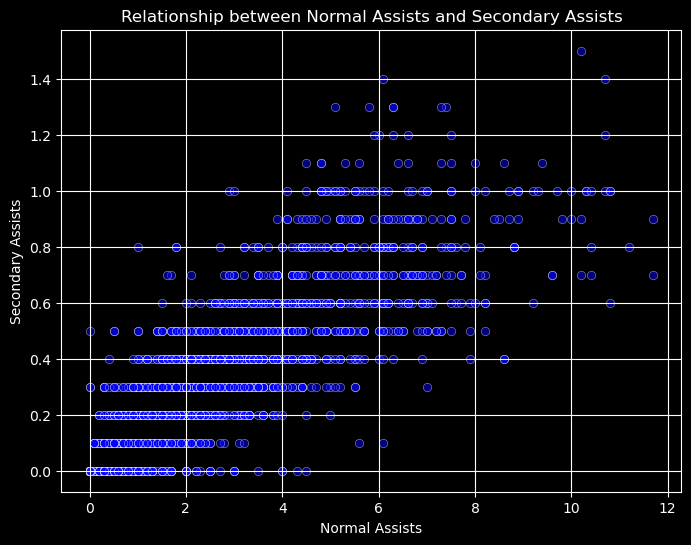

In [360]:
import seaborn as sns

# Extracting data
normal_ast = merged_secondary_potential_assists_usa['AST']
secondary_ast = merged_secondary_potential_assists_usa['SECONDARY_AST']

# Creating scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=normal_ast, y=secondary_ast, color='blue', alpha=0.5)
plt.title('Relationship between Normal Assists and Secondary Assists')
plt.xlabel('Normal Assists')
plt.ylabel('Secondary Assists')
plt.grid(True)
plt.show()

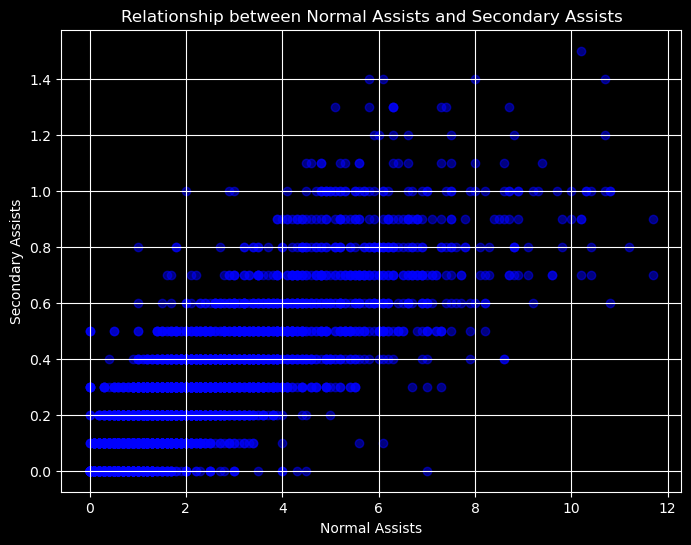

In [361]:
import matplotlib.pyplot as plt

# Extracting data
normal_ast = second_potential_assists['AST']
secondary_ast = second_potential_assists['SECONDARY_AST']

# Creating scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(normal_ast, secondary_ast, color='blue', alpha=0.5)
plt.title('Relationship between Normal Assists and Secondary Assists')
plt.xlabel('Normal Assists')
plt.ylabel('Secondary Assists')
plt.grid(True)
plt.show()

In [364]:
import altair as alt
import pandas as pd

# Increase row limit
alt.data_transformers.enable('default', max_rows=None)

merged_secondary_potential_assists_usa['Europe'] = 'Non-European'
merged_secondary_potential_assists_europe['Europe'] = 'European'

# Combine the two DataFrames
combined_df = pd.concat([merged_secondary_potential_assists_usa, merged_secondary_potential_assists_europe])

# Define colors for European and Non-European categories
color_scale = alt.Scale(domain=['European', 'Non-European'],
                        range=['#0d0a2c', '#c92684'])

# List of metrics to be plotted
metrics = ['SECONDARY_AST', 'POTENTIAL_AST']

# List to store the charts
charts = []

# For each metric, create a grouped bar chart and store the charts in a list
for metric in metrics:
    chart = alt.Chart(combined_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'mean {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'), scale=color_scale)
    ).properties(
        title=f'mean {metric} by Europe',
        width=200,
        height=300
    )
    charts.append(chart)

# Stack the charts in a single column
alt_col = alt.vconcat(*charts)

# Display the charts
alt_col



alt.VConcatChart(...)

In [ ]:
print(data_per_min_europe_regular['PLAYER_HEIGHT_METERS'].mean())
print(data_per_min_usa_regular['PLAYER_HEIGHT_METERS'].mean())

1.952834645669291
1.9118165395423525
